In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

from pathlib import Path

In [2]:
import auxiliary_code as aux
import misc

In [3]:
# Setting up the figures appearance.
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 30
plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
plt.rcParams['axes.titlesize'] = 1.2*plt.rcParams['font.size']
plt.rcParams['legend.fontsize'] = 0.6*plt.rcParams['font.size']
plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']

In [4]:
BASE_PATH = Path('/var/home/alex/docs/institutions/(2022-) FioTec/Data/ArboFronteiras/dados Foz/Foz do Iguaçu')

FILENAME_PTUV = BASE_PATH / 'Precipitação - Temperatura - Umidade - Vento - 2010 a 2022.xlsx'
FILENAME_DENGUE = BASE_PATHATH / 'sinan_dengue_2010_2022.xlsx'
FILENAME_MOSQUITO_POS = BASE_PATH / 'mosquitos positivos 2017 a 2022.xlsx'

* In `FILENAME_PTUV`, NULL elements are represented as `'     '`:

```
>>> data_ptuv = pd.read_excel(io=FILENAME_PTUV)
>>> data_ptuv["Temperatura Mínima (ºC)"].unique()

array([23.9, 23.8, 25.6, 24.6, 25.5, 23.1, 21.5, 24.5, 24.9, 23.6, 21.9,
       (...)
       7.8, 7.7, 5.8, '     ', 9.9, 26.3, 24.8, 26.5, 9.3, 6.2, 0.6, 1.3,
       (...)
       2.1, 0.3, -1, -1.4, -1.8, 1], dtype=object)
```

In [5]:
data_ptuv = pd.read_excel(io=FILENAME_PTUV, na_values='     ')

In [6]:
data_dengue = pd.read_excel(io=FILENAME_DENGUE)

In [7]:
data_mosquito = pd.read_excel(io=FILENAME_MOSQUITO_POS)

# Checking interest data.

In [8]:
pd.to_datetime(data_dengue["dt_sin_pri"]).dt.year.value_counts().sort_index(ascending=False)

2022    12886
2021    10475
2020    27305
2019    11595
2018     1876
2017     1920
2016    11030
2015     5922
2014      637
2013     5355
2012     1013
2011     6401
2010     9258
2009       10
2005        2
2004        1
2003        1
2002        6
2001        2
2000        3
1999        1
1998        2
1994        3
1993        1
1992        1
1990        2
1989        2
1988        2
1987        1
1983        3
1981        1
1979        2
1978        2
1976        2
1975        1
1972        1
1971        1
1969        1
1968        1
1967        1
1966        3
1965        1
1959        1
1955        1
1953        1
1950        1
1944        1
Name: dt_sin_pri, dtype: int64

In [9]:
data_dengue[data_dengue["dt_sin_pri"] < "2010-01-01"]["dt_sin_pri"].value_counts()

2009-12-30    2
2009-12-20    2
1983-04-29    1
2000-05-06    1
1993-07-06    1
             ..
1979-02-18    1
1968-04-24    1
2005-10-26    1
1950-11-05    1
1978-06-15    1
Name: dt_sin_pri, Length: 63, dtype: int64

In [10]:
data_dengue["dt_notific"], data_dengue["classi_fin"]

(0         2016-01-18
 1         2016-02-13
 2         2016-01-31
 3         2016-01-31
 4         2016-02-13
              ...    
 105733    2016-02-16
 105734    2016-02-16
 105735    2016-02-16
 105736    2016-02-05
 105737    2016-02-10
 Name: dt_notific, Length: 105738, dtype: object,
 0         10.0
 1         10.0
 2         10.0
 3          5.0
 4         10.0
           ... 
 105733     5.0
 105734    10.0
 105735    10.0
 105736     5.0
 105737     5.0
 Name: classi_fin, Length: 105738, dtype: float64)

* Info on `CLASSI_FIN` (`SINAN-DIC_DADOS_ONLINE.pdf`):
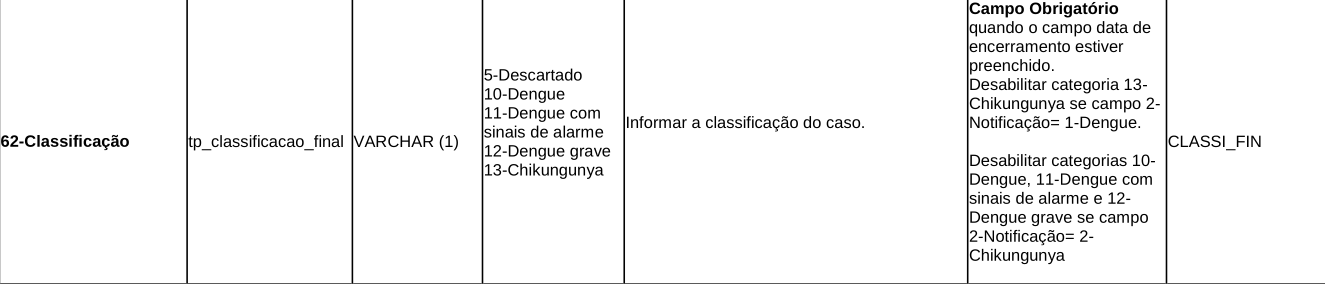

* Info on `DT_SIN_PRI` (...)

In [11]:
data_notific_class = data_dengue[["dt_sin_pri","classi_fin"]]

In [12]:
sorted(pd.unique(data_notific_class["classi_fin"]))

[0.0, 1.0, 2.0, 3.0, 5.0, 8.0, 10.0, 11.0, 12.0, nan]

* Checking nans.

In [13]:
data_dengue[data_dengue["classi_fin"].isna()]

,id,nu_notific,tp_not,id_agravo,dt_notific,sem_not,nu_ano,sg_uf_not,id_municip,id_regiona,...,semana notif,mês sint.,semana sint.,ano sint.,ano ep,pais,bimestre_dt_notif,semana pri-ano,quarteirao,geom
733,128690,7077695,2,A90,2022-07-21,202229,2022,41,410830,1363.0,...,29,julho,29,2022,2021/2022,Brasil,4,29-2022,2739,0101000020E61000009A0E8CEA36484BC07C3F2CEFB17B...
1260,128693,7063879,2,A90,2022-07-21,202229,2022,41,410830,1363.0,...,29,julho,29,2022,2021/2022,Brasil,4,29-2022,NE,NaN
1352,128692,7063861,2,A90,2022-07-21,202229,2022,41,410830,1363.0,...,29,julho,29,2022,2021/2022,Brasil,4,29-2022,1301,0101000020E61000004BAC4ADE11464BC0BA8E88177A86...
1369,128694,7050025,2,A90,2022-07-21,202229,2022,41,410830,1363.0,...,29,julho,29,2022,2021/2022,Brasil,4,29-2022,NE,NaN
1549,128695,7063867,2,A90,2022-07-21,202229,2022,41,410830,1363.0,...,29,julho,29,2022,2021/2022,Brasil,4,29-2022,132,0101000020E6100000F905C08C61484BC0FE9E0C2A5494...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103153,129153,7077907,2,A90,2022-08-03,202231,2022,41,410830,1363.0,...,31,agosto,31,2022,2022/2023,Brasil,4,31-2022,2798,0101000020E6100000C6361810B3474BC07173FB77467F...
103224,129154,7077901,2,A90,2022-08-03,202231,2022,41,410830,1363.0,...,31,agosto,31,2022,2022/2023,Brasil,4,31-2022,3477,0101000020E61000000E7CF74997494BC007A0BBA17A74...
103438,129208,7064055,2,A90,2022-08-04,202231,2022,41,410830,1363.0,...,31,agosto,31,2022,2022/2023,Brasil,4,31-2022,1922,0101000020E6100000E47CCFD5E4434BC0F9C614113684...
104639,129245,7077946,2,A90,2022-08-07,202232,2022,41,410830,1363.0,...,32,agosto,31,2022,2022/2023,Brasil,4,31-2022,3582,0101000020E6100000ECB5ACFE38474BC0257EC2DBEA73...


* ...???
* Are there too many `nan`s in there?

In [14]:
data_notific_class["classi_fin"].value_counts(dropna=False)

5.0     39757
10.0    34384
8.0     14056
1.0     12386
NaN      3648
11.0      888
0.0       306
12.0      136
2.0        94
3.0        83
Name: classi_fin, dtype: int64

In [15]:
data_notific_class = data_notific_class.dropna()

In [16]:
data_notific_class["dt_sin_pri"]

0         2016-01-16
1         2016-02-11
2         2016-01-30
3         2016-01-29
4         2016-02-11
             ...    
105733    2016-02-15
105734    2016-02-15
105735    2016-02-11
105736    2016-01-30
105737    2016-02-09
Name: dt_sin_pri, Length: 102090, dtype: object

* How many of these different stuff are there?

In [17]:
data_notific_class["classi_fin"].value_counts()

5.0     39757
10.0    34384
8.0     14056
1.0     12386
11.0      888
0.0       306
12.0      136
2.0        94
3.0        83
Name: classi_fin, dtype: int64

In [18]:
data_notific_class["dt_sin_pri"] = pd.to_datetime(data_notific_class["dt_sin_pri"])

In [19]:
data_notific_class["dt_sin_pri"]

0        2016-01-16
1        2016-02-11
2        2016-01-30
3        2016-01-29
4        2016-02-11
            ...    
105733   2016-02-15
105734   2016-02-15
105735   2016-02-11
105736   2016-01-30
105737   2016-02-09
Name: dt_sin_pri, Length: 102090, dtype: datetime64[ns]

* Need to group first...

Claudia, in `R:getCases()`:
```R
      dd$tipo <- "notified"
      dd$tipo[dd$classi_fin != 5] <- "probable"
      dd$tipo[dd$classi_fin != 5 & dd$criterio == 1] <- "lab_confirmed"
```

* Let's see where does `criterio` come from. Add it to the new data.

In [20]:
data_dengue["criterio"]

0         1.0
1         1.0
2         1.0
3         1.0
4         2.0
         ... 
105733    2.0
105734    2.0
105735    2.0
105736    1.0
105737    1.0
Name: criterio, Length: 105738, dtype: float64

In [21]:
data_notific_class = data_dengue[["dt_sin_pri","classi_fin","criterio"]]

In [22]:
data_notific_class = data_notific_class[data_notific_class["dt_sin_pri"] >= "2010-01-01"]

In [23]:
# df['column2'][
#    (df['column2'] == 0) | (df['column2'] == 'Null')
# ] = df['column1']

In [24]:
# dd$tipo <- "notified"
data_notific_class = data_notific_class.assign(tipo = "notified")

In [25]:
# dd$tipo[dd$classi_fin != 5] <- "probable"
class_not_5 = data_notific_class["classi_fin"] != 5

data_notific_class["tipo"][
    class_not_5
] = "probable"

/tmp/ipykernel_76348/3824060769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_notific_class["tipo"][


In [26]:
data_notific_class

,dt_sin_pri,classi_fin,criterio,tipo
0,2016-01-16,10.0,1.0,probable
1,2016-02-11,10.0,1.0,probable
2,2016-01-30,10.0,1.0,probable
3,2016-01-29,5.0,1.0,notified
4,2016-02-11,10.0,2.0,probable
...,...,...,...,...
105733,2016-02-15,5.0,2.0,notified
105734,2016-02-15,10.0,2.0,probable
105735,2016-02-11,10.0,2.0,probable
105736,2016-01-30,5.0,1.0,notified


In [27]:
# dd$tipo[dd$classi_fin != 5 & dd$criterio == 1] <- "lab_confirmed"
criterio_is_1 = data_notific_class["criterio"] == 1

mask_2 = (class_not_5) & (criterio_is_1)
data_notific_class["tipo"][mask_2] = "lab_confirmed"

/tmp/ipykernel_76348/168901397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_notific_class["tipo"][mask_2] = "lab_confirmed"


In [28]:
data_notific_class

,dt_sin_pri,classi_fin,criterio,tipo
0,2016-01-16,10.0,1.0,lab_confirmed
1,2016-02-11,10.0,1.0,lab_confirmed
2,2016-01-30,10.0,1.0,lab_confirmed
3,2016-01-29,5.0,1.0,notified
4,2016-02-11,10.0,2.0,probable
...,...,...,...,...
105733,2016-02-15,5.0,2.0,notified
105734,2016-02-15,10.0,2.0,probable
105735,2016-02-11,10.0,2.0,probable
105736,2016-01-30,5.0,1.0,notified


* adding three more columns: "notified", "probable", "lab_confirmed", with their values

In [29]:
dummy_dengue = pd.get_dummies(data_notific_class["tipo"])

In [30]:
data_notific_class = pd.concat(
    [data_notific_class, dummy_dengue],
    axis=1)

* aggregating data according to "`DT_SIN_PRI`"

In [31]:
data_notific_class = data_notific_class.groupby(
    ["dt_sin_pri"],
    as_index=True
)[["notified",
   "probable",
   "lab_confirmed"]].sum()

In [32]:
data_notific_class

,notified,probable,lab_confirmed
dt_sin_pri,,,
2010-01-01,0.0,0.0,1.0
2010-01-03,1.0,0.0,0.0
2010-01-04,0.0,2.0,0.0
2010-01-05,1.0,0.0,0.0
2010-01-06,3.0,1.0,0.0
...,...,...,...
2022-08-26,2.0,11.0,0.0
2022-08-27,1.0,12.0,0.0
2022-08-28,0.0,3.0,0.0


* filling missing dates.

In [33]:
pd.api.types.is_datetime64_any_dtype(data_notific_class.index)

False

In [34]:
data_notific_class = misc.fill_missing_dates(data_notific_class,
                                             format="%Y-%m-%d")

* Checking these on `data_dengue`.

In [35]:
data_dengue[data_dengue["dt_sin_pri"] == "2022-08-26"]

,id,nu_notific,tp_not,id_agravo,dt_notific,sem_not,nu_ano,sg_uf_not,id_municip,id_regiona,...,semana notif,mês sint.,semana sint.,ano sint.,ano ep,pais,bimestre_dt_notif,semana pri-ano,quarteirao,geom
21098,129692,7095505,2,A90,2022-08-27,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,821,0101000020E6100000C7588C7A694B4BC0ACF89017E788...
59640,129669,7103963,2,A90,2022-08-26,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,2653,0101000020E61000006935CB757F464BC0F6F91E042780...
59655,129672,7103953,2,A90,2022-08-26,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,2523,0101000020E6100000728723F932444BC01281BA0DC27D...
60026,129680,7095516,2,A90,2022-08-27,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,1008,0101000020E61000000349CF6D0B4A4BC054E5E979E083...
62009,117678,7103961,2,A90,2022-08-26,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,3367,0101000020E6100000848FA53F614C4BC052632059B177...
63146,129695,7095518,2,A90,2022-08-27,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,3560,0101000020E610000029A1471EC8474BC0A6067D9B3174...
63460,129700,7007375,2,A90,2022-08-27,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,108,0101000020E61000003B6760743B494BC00426557F5093...
63725,129701,7103968,2,A90,2022-08-27,202234,2022,41,410830,1363.0,...,34,agosto,34,2022,2022/2023,Brasil,4,34-2022,2579,0101000020E6100000C151502EE8454BC0BF8F8907017F...
73784,129713,7103981,2,A90,2022-08-28,202235,2022,41,410830,1363.0,...,35,agosto,34,2022,2022/2023,Brasil,4,34-2022,3176,0101000020E61000000EA951C2AC474BC0525BD0EEC376...
73790,129724,7103935,2,A90,2022-08-29,202235,2022,41,410830,1363.0,...,35,agosto,34,2022,2022/2023,Brasil,4,34-2022,2937,0101000020E6100000968DE1EDD2494BC0EEB4DC491E7E...


* plotting notified, probable and lab_confirmed cases.

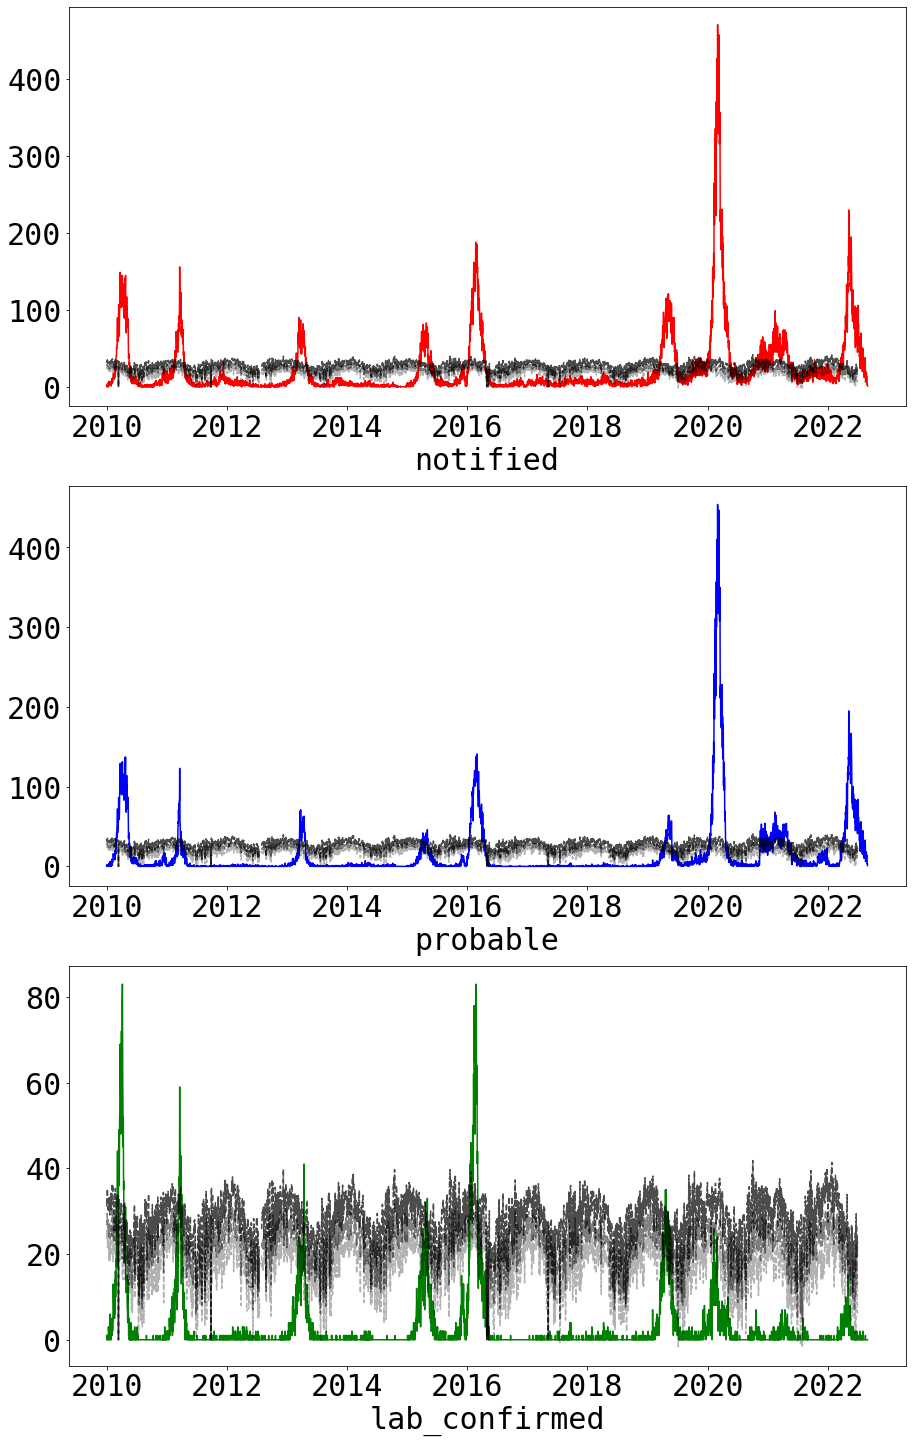

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 25))
axes[0].plot(data_notific_class.index,
             data_notific_class["notified"]+data_notific_class["probable"]+data_notific_class["lab_confirmed"],
             c='red')
axes[0].set_xlabel("notified")

axes[1].plot(data_notific_class.index,
             data_notific_class["probable"]+data_notific_class["lab_confirmed"],
             c='blue')
axes[1].set_xlabel("probable")
axes[2].plot(data_notific_class.index,
             data_notific_class["lab_confirmed"],
             c='green')
axes[2].set_xlabel("lab_confirmed")

for ax in axes:
    ax.plot(data_ptuv["Data"],
            data_ptuv["Temperatura Média (ºC)"],
            "--",
            color='black',
            alpha=0.5)
    ax.plot(data_ptuv["Data"],
            data_ptuv["Temperatura Máxima (ºC)"],
            "--",
            color='black',
            alpha=0.7)
    ax.plot(data_ptuv["Data"],
            data_ptuv["Temperatura Mínima (ºC)"],
            "--",
            color='black',
            alpha=0.3)

In [37]:
data_notific_class.index.min()

Timestamp('2010-01-01 00:00:00', freq='D')

In [38]:
data_notific_class.to_csv("dengue-notified_probable_confirmed.csv")

In [39]:
data_2016 = data_notific_class[(data_notific_class.index >= "2016-01-12") & (data_notific_class.index <= "2016-12-31")]

In [40]:
data_2016.to_csv("dengue_2016-notified_probable_confirmed.csv")

* Let's go to the mosquitos now.

# Checking mosquitos data

In [41]:
data_mosquito.columns

Index(['id', 'quarteirao', 'id_armadilha', 'area', 'data_atividade',
       'tipo_atividade', 'notificacao', 'ciclo', 'habitantes',
       'total_dep_aed_aeg', 'total_dep_aed_alb', 'total_dep_outros',
       'mosq_aed_aeg_m_morto', 'mosq_aed_aeg_m_vivo', 'mosq_aed_aeg_f_morto',
       'mosq_aed_aeg_f_vivo', 'mosq_aed_alb_m_morto', 'mosq_aed_alb_m_vivo',
       'mosq_aed_alb_f_morto', 'mosq_aed_alb_f_vivo', 'mosq_outros_m_morto',
       'mosq_outros_m_vivo', 'mosq_outros_f_morto', 'mosq_outros_f_vivo',
       'cmt_dengue', 'cmt_zika', 'cmt_chk', 'cmt_outras', 'amostra_ccz',
       'long', 'lat'],
      dtype='object')

In [80]:
data_mosquito["total_dep_aed_aeg"].unique()

array([0, 1, 2])

In [42]:
data_mosquito["data_atividade"], data_mosquito["tipo_atividade"]

(0     2018-01-05
 1     2018-01-05
 2     2018-01-05
 3     2018-01-08
 4     2018-03-07
          ...    
 157   2018-01-03
 158   2018-01-03
 159   2018-01-04
 160   2018-01-04
 161   2018-01-04
 Name: data_atividade, Length: 162, dtype: datetime64[ns],
 0      LIRAa
 1      LIRAa
 2      LIRAa
 3      LIRAa
 4      LIRAa
        ...  
 157    LIRAa
 158    LIRAa
 159    LIRAa
 160    LIRAa
 161    LIRAa
 Name: tipo_atividade, Length: 162, dtype: object)

In [43]:
data_mosquito["tipo_atividade"].unique()

array(['LIRAa'], dtype=object)

In [44]:
data_mosquito["ciclo"].unique()

array([nan, '(vazio)', '0', '2', '7', '5'], dtype=object)

In [102]:
data_mosquito_group = data_mosquito.groupby(
    ["data_atividade"],
    as_index=True
)[["total_dep_aed_aeg", "mosq_aed_aeg_m_morto", "mosq_aed_aeg_m_vivo", "mosq_aed_aeg_f_morto",
   "mosq_aed_aeg_f_vivo"]].sum()

In [103]:
data_armadilha = data_mosquito.groupby(
    ["data_atividade"],
    as_index=True
)[["id_armadilha"]].count()

In [104]:
data_armadilha

,id_armadilha
data_atividade,
2017-03-06,3
2017-03-08,6
2017-07-03,3
2017-07-04,1
2017-07-06,2
2017-07-07,1
2017-09-12,5
2017-09-13,3
2017-09-15,1


In [105]:
data_mosquito_fill = misc.fill_missing_dates(data_mosquito_group)
data_armadilha_fill = misc.fill_missing_dates(data_armadilha)

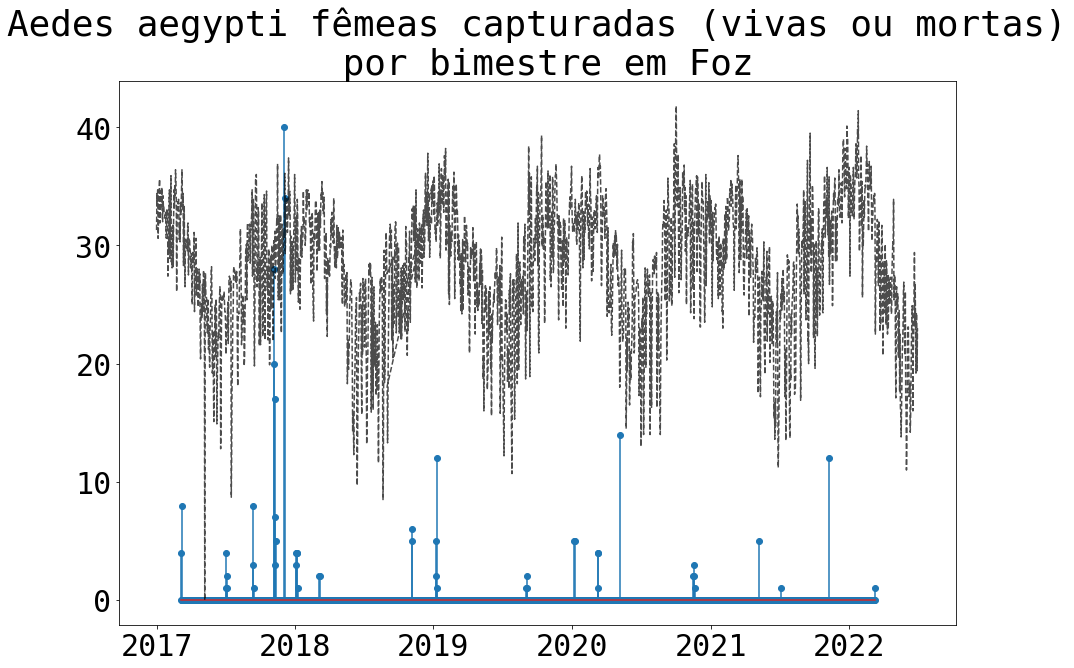

In [598]:
plt.figure(figsize=(15, 10))
plt.stem(data_mosquito_fill.index,
         data_mosquito_fill["mosq_aed_aeg_f_vivo"]+data_mosquito_fill["mosq_aed_aeg_f_morto"])
plt.title("Aedes aegypti fêmeas capturadas (vivas ou mortas)\n por bimestre em Foz")

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Temperatura Máxima (ºC)"],
         "--",
         color='black',
         alpha=0.7)

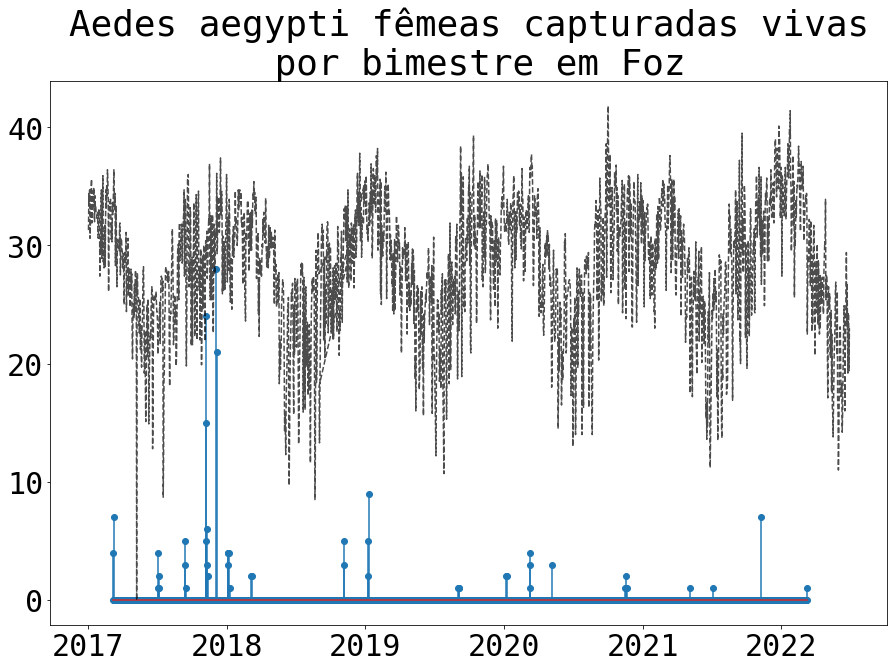

In [194]:
plt.figure(figsize=(15, 10))
plt.stem(data_mosquito_fill.index,
         data_mosquito_fill["mosq_aed_aeg_f_vivo"])
plt.title("Aedes aegypti fêmeas capturadas vivas\n por bimestre em Foz")

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Temperatura Máxima (ºC)"],
         "--",
         color='black',
         alpha=0.7)

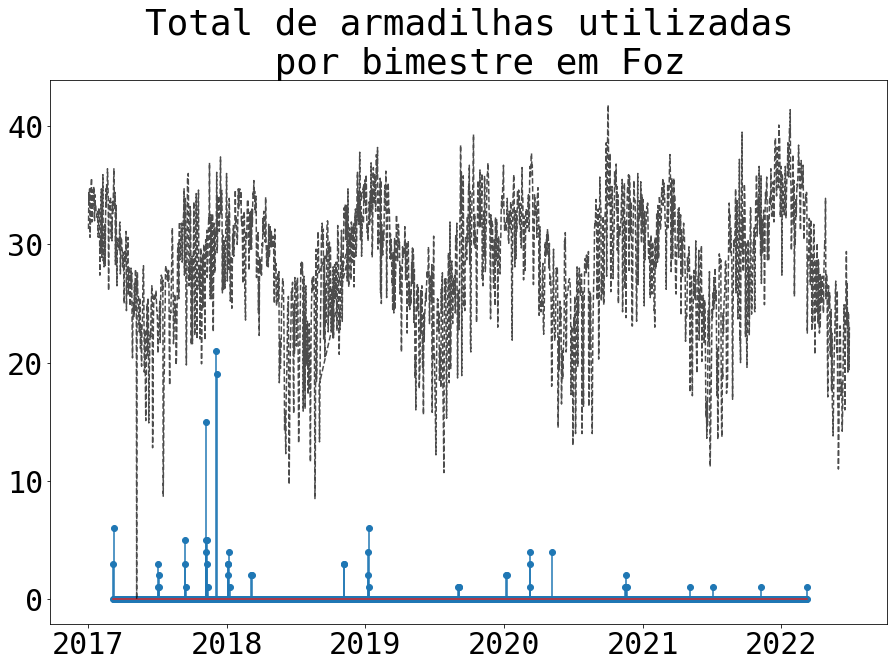

In [197]:
plt.figure(figsize=(15, 10))
plt.stem(data_armadilha_fill.index,
         data_armadilha_fill)
plt.title("Total de armadilhas utilizadas\n por bimestre em Foz")

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Temperatura Máxima (ºC)"],
         "--",
         color='black',
         alpha=0.7)

In [109]:
data_mosquito_fill[(data_mosquito_fill["mosq_aed_aeg_f_morto"] > 0) | (data_mosquito_fill["mosq_aed_aeg_f_vivo"] > 0)]

,total_dep_aed_aeg,mosq_aed_aeg_m_morto,mosq_aed_aeg_m_vivo,mosq_aed_aeg_f_morto,mosq_aed_aeg_f_vivo
2017-03-06,1,0,2,0,4
2017-03-08,0,0,1,1,7
2017-07-03,0,0,0,0,4
2017-07-04,0,0,0,0,1
2017-07-06,0,0,0,0,2
2017-07-07,0,0,0,0,1
2017-09-12,0,0,0,3,5
2017-09-13,0,1,0,0,3
2017-09-15,0,0,0,0,1
2017-11-06,1,0,6,5,15


* OK, mosquito_pos should be dengue-positive mosquitos. Let's check the DBF...

In [404]:
from dbfread import DBF

In [405]:
data_dbf = DBF("/var/home/alex/docs/institutions/(2022-) FioTec/Data/ArboFronteiras/dados Foz/dados_mosquitos_Foz_com_dbf/armadilhas_liraa_XY.dbf")

In [406]:
data_mosquito_dbf = pd.DataFrame(iter(data_dbf))

In [407]:
data_mosquito_dbf.bimestre.unique()

array([1., 2., 3., 4., 5., 6.])

In [408]:
data_mosquito_dbf.columns

Index(['_uid_', 'bimestre', 'id', 'quarteirao', 'id_armadil', 'area',
       'data_ativi', 'tipo_ativi', 'notificaca', 'ciclo', 'habitantes',
       'tt_dep_aa', 'tt_dep_aal', 'tt_dep_out', 'm_aaeg_m_m', 'm_aaeg_m_v',
       'm_aaeg_f_m', 'm_aaeg_f_v', 'm_aalb_m_m', 'm_aalb_m_v', 'm_aalb_f_m',
       'm_aalb_f_v', 'm_out_m_m', 'm_out_m_v', 'm_out_f_m', 'm_out_f_v',
       'cmt_dengue', 'cmt_zika', 'cmt_chk', 'cmt_outras', 'x', 'y'],
      dtype='object')

In [411]:
data_mosquito_dbf_group = data_mosquito_dbf.groupby(
    ["data_ativi"],
    as_index=True
)[["tt_dep_aa", "m_aaeg_m_m", "m_aaeg_m_v", "m_aaeg_f_m", "m_aaeg_f_v"]].sum()

In [412]:
data_mosquito_dbf_group

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v
data_ativi,,,,,
2017-01-09,36,5,2,66,8
2017-01-10,25,2,1,65,13
2017-01-11,17,10,25,84,43
2017-01-12,25,6,15,46,47
2017-01-13,8,4,6,42,15
...,...,...,...,...,...
2022-05-09,43,3,2,303,12
2022-05-10,19,4,1,293,22
2022-05-11,51,3,0,246,11


In [413]:
data_armadilha_dbf = data_mosquito_dbf.groupby(
    ["data_ativi"],
    as_index=True
)[["id_armadil"]].count()

In [414]:
data_armadilha_dbf

,id_armadil
data_ativi,
2017-01-09,588
2017-01-10,568
2017-01-11,561
2017-01-12,482
2017-01-13,284
...,...
2022-05-09,572
2022-05-10,551
2022-05-11,547


In [415]:
data_mosquito_dbf_fill = misc.fill_missing_dates(data_mosquito_dbf_group)
data_armadilha_dbf_fill = misc.fill_missing_dates(data_armadilha_dbf)

In [416]:
data_ptuv_2017 = data_ptuv[data_ptuv.Data >= "2017-01-01"]

In [417]:
data_mosquito_dbf_fill

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v
2017-01-09,36,5,2,66,8
2017-01-10,25,2,1,65,13
2017-01-11,17,10,25,84,43
2017-01-12,25,6,15,46,47
2017-01-13,8,4,6,42,15
...,...,...,...,...,...
2022-05-09,43,3,2,303,12
2022-05-10,19,4,1,293,22
2022-05-11,51,3,0,246,11
2022-05-12,36,2,4,192,15


In [418]:
data_mosq_arm_pos_fill = data_mosquito_fill.join(data_armadilha_fill)

In [419]:
data_mosq_arm_pos_fill.rename(columns = 
    {'total_dep_aed_aeg' : 'tt_dep_aa_pos',
     'mosq_aed_aeg_m_morto' : 'm_aaeg_m_m_pos',
     'mosq_aed_aeg_m_vivo' : 'm_aaeg_m_v_pos',
     'mosq_aed_aeg_f_morto' : 'm_aaeg_f_m_pos',
     'mosq_aed_aeg_f_vivo' : 'm_aaeg_f_v_pos',
     'id_armadilha' : 'id_armadil_pos'
    }, inplace=True)

In [420]:
data_mosq_arm_dbf_fill = data_mosquito_dbf_fill.join(data_armadilha_dbf_fill)

* Now, combining both tables.

In [421]:
data_mosq_arm_dbf_fill

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,id_armadil
2017-01-09,36,5,2,66,8,588
2017-01-10,25,2,1,65,13,568
2017-01-11,17,10,25,84,43,561
2017-01-12,25,6,15,46,47,482
2017-01-13,8,4,6,42,15,284
...,...,...,...,...,...,...
2022-05-09,43,3,2,303,12,572
2022-05-10,19,4,1,293,22,551
2022-05-11,51,3,0,246,11,547
2022-05-12,36,2,4,192,15,457


In [422]:
data_mosq_arm_pos_fill

,tt_dep_aa_pos,m_aaeg_m_m_pos,m_aaeg_m_v_pos,m_aaeg_f_m_pos,m_aaeg_f_v_pos,id_armadil_pos
2017-03-06,1,0,2,0,4,3
2017-03-07,0,0,0,0,0,0
2017-03-08,0,0,1,1,7,6
2017-03-09,0,0,0,0,0,0
2017-03-10,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-03-06,0,0,0,0,0,0
2022-03-07,0,0,0,0,0,0
2022-03-08,0,0,0,0,0,0
2022-03-09,0,0,0,0,0,0


In [287]:
data = data_mosq_arm_dbf_fill.join(data_mosq_arm_pos_fill)

In [290]:
data.to_csv("mosq_aaeg_trap_pos-2017_2022.csv")

# 1.  Soma de Aedes aegypti femeas capturadas (vivas ou mortas) por bimestre em Foz
		(tt_aaeg_f_m + tt_aaeg_f_v ) agregado por bimestre ou data_ativi

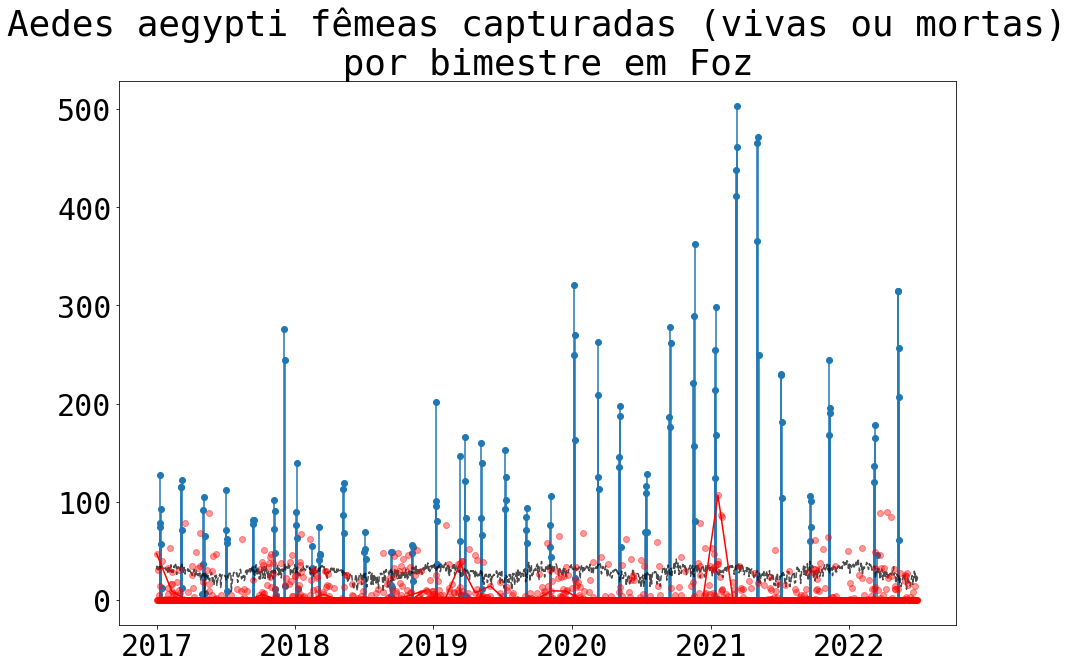

In [608]:
plt.figure(figsize=(15, 10))
plt.stem(data_mosquito_dbf_fill.index,
         data_mosquito_dbf_fill["m_aaeg_f_v"] + data_mosquito_dbf_fill["m_aaeg_f_m"])
plt.title("Aedes aegypti fêmeas capturadas (vivas ou mortas)\n por bimestre em Foz")

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Temperatura Máxima (ºC)"],
         "--",
         color='black',
         alpha=0.7)

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Precipitação Diária (mm)"],
         'o',
         color='red',
         alpha=0.4)

NUM = 40

x = np.linspace(start=2017, 
                stop=2022,
                num=len(data_ptuv_2017["Precipitação Diária (mm)"][::NUM]),
                endpoint=True)

f2 = interpolate.interp1d(x, data_ptuv_2017["Precipitação Diária (mm)"][::NUM], kind='cubic')
plt.plot(data_ptuv_2017["Data"][::NUM],
         f2(x),
         color="red")

* Two plots

In [526]:
x.shape


335

In [582]:
xnew

array([2017.        , 2017.00249128, 2017.00498256, ..., 2021.99252616,
       2021.99501744, 2021.99750872])

In [585]:
x

array([2017.        , 2017.09803922, 2017.19607843, 2017.29411765,
       2017.39215686, 2017.49019608, 2017.58823529, 2017.68627451,
       2017.78431373, 2017.88235294, 2017.98039216, 2018.07843137,
       2018.17647059, 2018.2745098 , 2018.37254902, 2018.47058824,
       2018.56862745, 2018.66666667, 2018.76470588, 2018.8627451 ,
       2018.96078431, 2019.05882353, 2019.15686275, 2019.25490196,
       2019.35294118, 2019.45098039, 2019.54901961, 2019.64705882,
       2019.74509804, 2019.84313725, 2019.94117647, 2020.03921569,
       2020.1372549 , 2020.23529412, 2020.33333333, 2020.43137255,
       2020.52941176, 2020.62745098, 2020.7254902 , 2020.82352941,
       2020.92156863, 2021.01960784, 2021.11764706, 2021.21568627,
       2021.31372549, 2021.41176471, 2021.50980392, 2021.60784314,
       2021.70588235, 2021.80392157, 2021.90196078])

In [591]:
xnew.shape

(2007,)

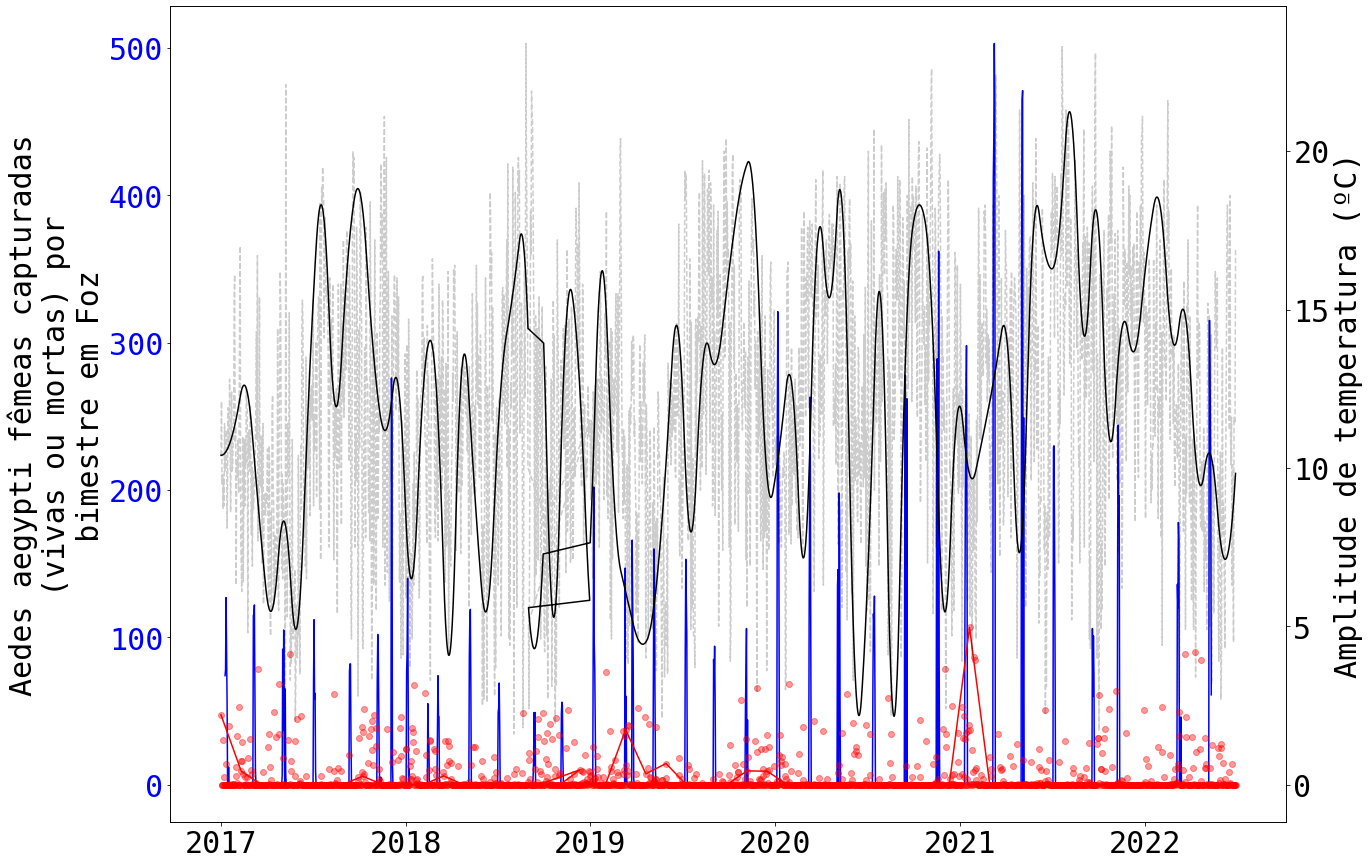

In [616]:
import numpy as np 
import matplotlib.pyplot as plt 

_, ax_left = plt.subplots(figsize=(20, 15)) 

ax_left.set_ylabel("Aedes aegypti fêmeas capturadas\n (vivas ou mortas) por\n bimestre em Foz") 
ax_left.plot(data_mosquito_dbf_fill.index,
             data_mosquito_dbf_fill["m_aaeg_f_v"] + data_mosquito_dbf_fill["m_aaeg_f_m"],
             color="blue") 
ax_left.tick_params(axis="y",
                    labelcolor="blue") 

ax_right = ax_left.twinx() 
ax_right.set_ylabel("Amplitude de temperatura (ºC)",
                    color="black")
ax_right.plot(data_ptuv_2017["Data"],
              data_ptuv_2017["Temperatura Máxima (ºC)"]-data_ptuv_2017["Temperatura Mínima (ºC)"],
              "--",
              color="black",
              alpha=0.2)
ax_right.tick_params(axis ="y")

# adding a spline on the temperature.

from scipy import interpolate

NUM = 25

x = np.linspace(start=2017, 
                stop=2022,
                num=len((data_ptuv_2017["Temperatura Máxima (ºC)"]-data_ptuv_2017["Temperatura Mínima (ºC)"])[::NUM]),
                endpoint=True)

spl = interpolate.splrep(x,
                         (data_ptuv_2017["Temperatura Máxima (ºC)"]-data_ptuv_2017["Temperatura Mínima (ºC)"])[::NUM],
                         s=0,
                         k=2)

xnew = np.arange(2017, 2022,(2022-2017)/len(data_ptuv_2017["Data"]))
ynew = interpolate.splev(xnew, spl)

ax_right.plot(data_ptuv_2017["Data"],
              ynew,
              color="black")


ax_left.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Precipitação Diária (mm)"],
         'o',
         color='red',
         alpha=0.4)

NUM = 40

x = np.linspace(start=2017, 
                stop=2022,
                num=len(data_ptuv_2017["Precipitação Diária (mm)"][::NUM]),
                endpoint=True)

f2 = interpolate.interp1d(x, data_ptuv_2017["Precipitação Diária (mm)"][::NUM], kind='cubic')
ax_left.plot(data_ptuv_2017["Data"][::NUM],
         f2(x),
         color="red")

# 2. Soma de Aedes aegypti femeas capturadas vivas por bimestre em Foz
		tt_aaeg_f_v  agregado por bimestre ou data_ativi

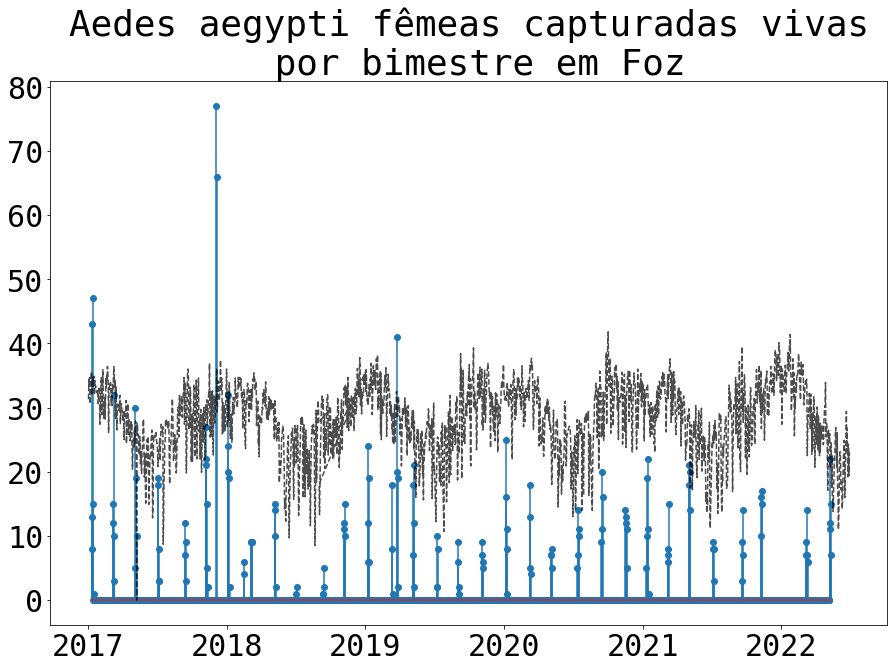

In [192]:
plt.figure(figsize=(15, 10))
plt.stem(data_mosquito_dbf_fill.index,
         data_mosquito_dbf_fill["m_aaeg_f_v"])
plt.title("Aedes aegypti fêmeas capturadas vivas\n por bimestre em Foz")

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Temperatura Máxima (ºC)"],
         "--",
         color='black',
         alpha=0.7)

* Two plots

In [573]:
x.shape

(40,)

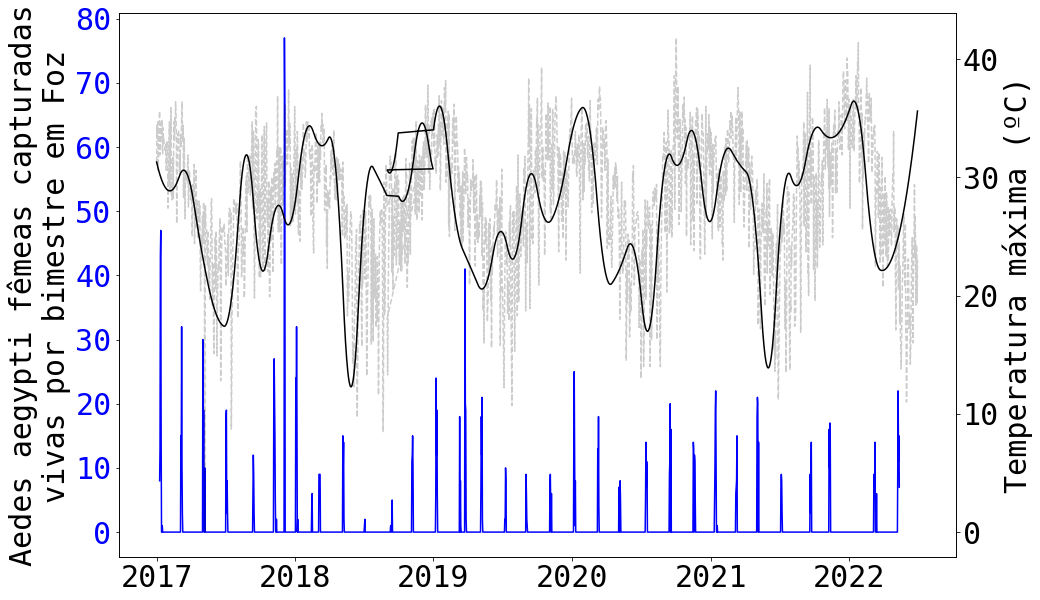

In [574]:
import numpy as np 
import matplotlib.pyplot as plt 

_, ax_left = plt.subplots(figsize=(15, 10)) 

ax_left.set_ylabel("Aedes aegypti fêmeas capturadas\n vivas por bimestre em Foz") 
ax_left.plot(data_mosquito_dbf_fill.index,
             data_mosquito_dbf_fill["m_aaeg_f_v"],
             color="blue") 
ax_left.tick_params(axis="y",
                    labelcolor="blue") 

ax_right = ax_left.twinx() 
ax_right.set_ylabel("Temperatura máxima (ºC)",
                    color="black")
ax_right.plot(data_ptuv_2017["Data"],
              data_ptuv_2017["Temperatura Máxima (ºC)"],
              "--",
              color="black",
              alpha=0.2)
ax_right.tick_params(axis ="y")

# adding a spline on the temperature.

from scipy import interpolate

NUM = 40

x = np.arange(2017, 2022, (2022-2017)/len(data_ptuv_2017["Temperatura Máxima (ºC)"][::NUM]))

spl = interpolate.splrep(x,
                         data_ptuv_2017["Temperatura Máxima (ºC)"][::NUM],
                         s=0,
                         k=2)

xnew = np.arange(2017, 2022, (2022-2017)/len(data_ptuv_2017["Data"]))
ynew = interpolate.splev(xnew, spl)

ax_right.plot(data_ptuv_2017["Data"],
              ynew,
              color="black")

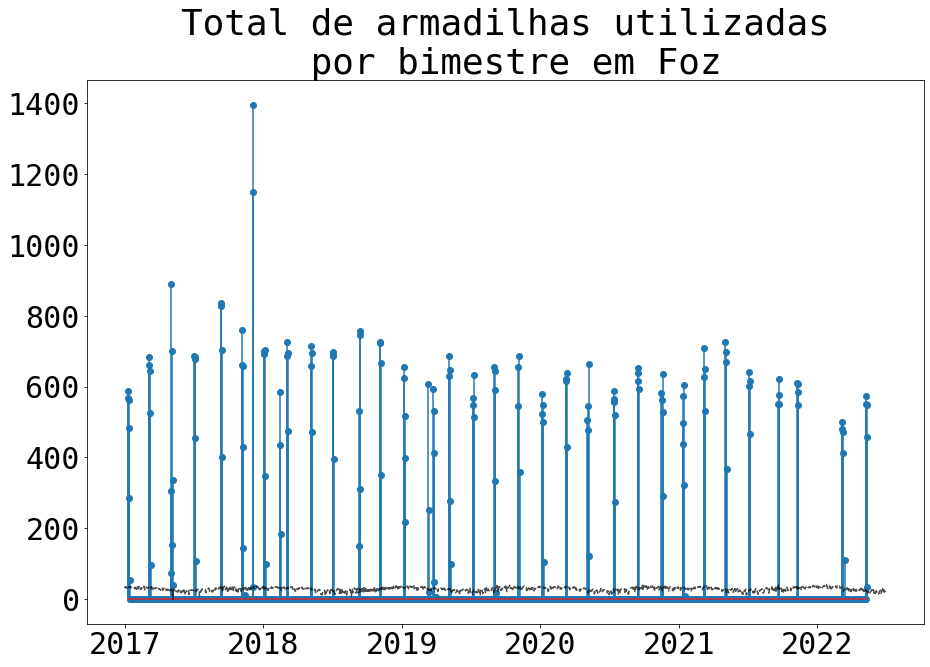

In [198]:
plt.figure(figsize=(15, 10))
plt.stem(data_armadilha_dbf_fill.index,
         data_armadilha_dbf_fill)
plt.title("Total de armadilhas utilizadas\n por bimestre em Foz")

plt.plot(data_ptuv_2017["Data"],
         data_ptuv_2017["Temperatura Máxima (ºC)"],
         "--",
         color='black',
         alpha=0.7)

* Plot with two axes

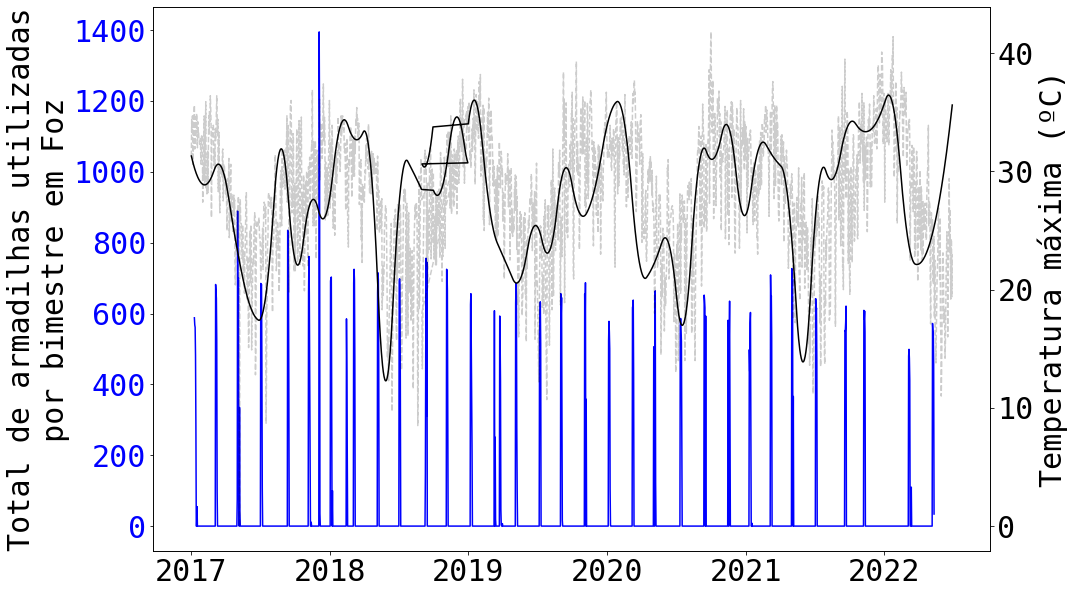

In [565]:
import numpy as np 
import matplotlib.pyplot as plt 

_, ax_left = plt.subplots(figsize=(15, 10)) 

ax_left.set_ylabel("Total de armadilhas utilizadas\n por bimestre em Foz") 
ax_left.plot(data_armadilha_dbf_fill.index,
             data_armadilha_dbf_fill,
             color="blue") 
ax_left.tick_params(axis="y",
                    labelcolor="blue") 

ax_right = ax_left.twinx() 
ax_right.set_ylabel("Temperatura máxima (ºC)",
                    color="black")
ax_right.plot(data_ptuv_2017["Data"],
              data_ptuv_2017["Temperatura Máxima (ºC)"],
              "--",
              color="black",
              alpha=0.2)
ax_right.tick_params(axis ="y")


# adding a spline on the temperature.

from scipy import interpolate

NUM = 40

x = np.arange(2017, 2022, (2022-2017)/len(data_ptuv_2017["Temperatura Máxima (ºC)"][::NUM]))

spl = interpolate.splrep(x,
                         data_ptuv_2017["Temperatura Máxima (ºC)"][::NUM],
                         s=0,
                         k=2)

xnew = np.arange(2017, 2022, (2022-2017)/len(data_ptuv_2017["Data"]))
ynew = interpolate.splev(xnew, spl)

ax_right.plot(data_ptuv_2017["Data"],
              ynew,
              color="black")

# 3. Total de armadilhas positivas para Aedes aegypti femea em Foz por bimestre
		sum[(tt_aaeg_f_m OR  tt_aaeg_f_v ) > 0] agregado por bimestre ou data_ativi

* We can use just `data` :)

In [323]:
data["tt_dep_aa"], data["m_aaeg_f_m"], data["m_aaeg_f_v"]

(2017-01-09    36
 2017-01-10    25
 2017-01-11    17
 2017-01-12    25
 2017-01-13     8
               ..
 2022-05-09    43
 2022-05-10    19
 2022-05-11    51
 2022-05-12    36
 2022-05-13     0
 Freq: D, Name: tt_dep_aa, Length: 1951, dtype: int64,
 2017-01-09     66
 2017-01-10     65
 2017-01-11     84
 2017-01-12     46
 2017-01-13     42
              ... 
 2022-05-09    303
 2022-05-10    293
 2022-05-11    246
 2022-05-12    192
 2022-05-13     54
 Freq: D, Name: m_aaeg_f_m, Length: 1951, dtype: int64,
 2017-01-09     8
 2017-01-10    13
 2017-01-11    43
 2017-01-12    47
 2017-01-13    15
               ..
 2022-05-09    12
 2022-05-10    22
 2022-05-11    11
 2022-05-12    15
 2022-05-13     7
 Freq: D, Name: m_aaeg_f_v, Length: 1951, dtype: int64)

In [320]:
data[(data["m_aaeg_f_v"] > 0) | (data["m_aaeg_f_m"] > 0)]

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,id_armadil,tt_dep_aa_pos,m_aaeg_m_m_pos,m_aaeg_m_v_pos,m_aaeg_f_m_pos,m_aaeg_f_v_pos,id_armadil_pos
2017-01-09,36,5,2,66,8,588,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,25,2,1,65,13,568,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,17,10,25,84,43,561,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-12,25,6,15,46,47,482,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,8,4,6,42,15,284,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,43,3,2,303,12,572,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-10,19,4,1,293,22,551,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,51,3,0,246,11,547,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-12,36,2,4,192,15,457,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: x and y must have same first dimension, but have shapes (1951,) and (161, 12)

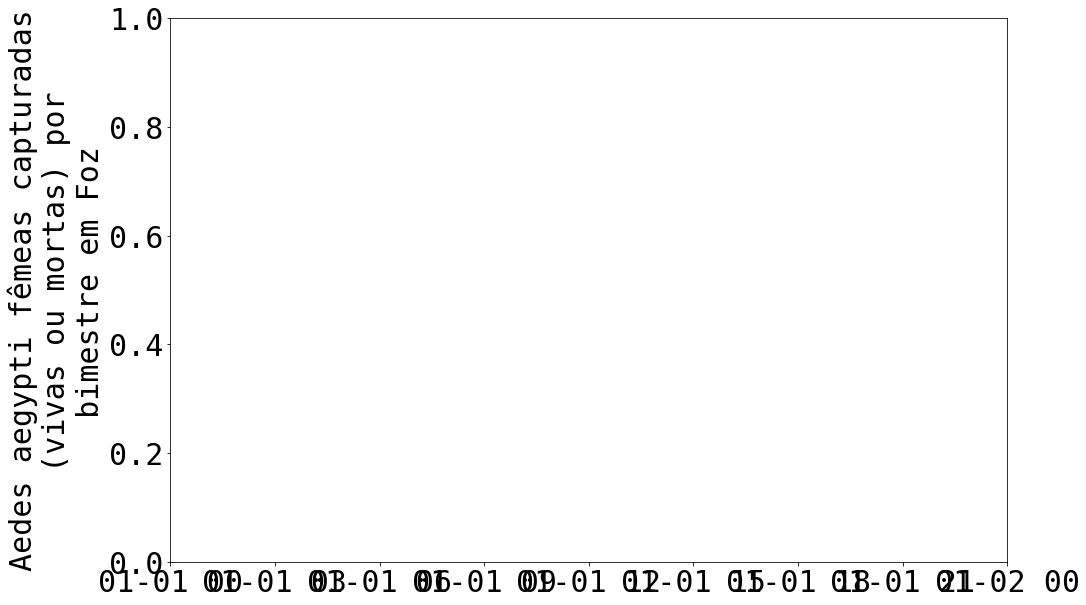

In [317]:
import numpy as np 
import matplotlib.pyplot as plt 

_, ax_left = plt.subplots(figsize=(15, 10)) 

ax_left.set_ylabel("Aedes aegypti fêmeas capturadas\n (vivas ou mortas) por\n bimestre em Foz") 
ax_left.plot(data.index,
             data[data["m_aaeg_f_v"] + data["m_aaeg_f_m"] > 0],
             color="blue") 
ax_left.tick_params(axis="y",
                    labelcolor="blue") 

ax_right = ax_left.twinx() 
ax_right.set_ylabel("Temperatura máxima (ºC)",
                    color="black")
ax_right.plot(data_ptuv_2017["Data"],
              data_ptuv_2017["Temperatura Máxima (ºC)"],
              "--",
              color="black")
ax_right.tick_params(axis ="y")

In [155]:
data_mosquito_dbf["id_armadil"]

0         3-03080
1         3-02960
2        11-06704
3         8-06421
4         8-06665
           ...   
81511     4-07762
81512     4-08181
81513     3-03472
81514     3-03903
81515     3-03836
Name: id_armadil, Length: 81516, dtype: object

In [176]:
# - índice de positividade = proporcao de armadilhas positivas (>0 capturas)
# - índice de infestação = # capturas/#armadilhas

# A partir desses indicadores, podemos calcular:

## indice de positividade = armadilhas com mosquitos / total de armadilhas

In [397]:
mask_traps_w_mosquitos = (data["m_aaeg_f_m"] > 0) | (data["m_aaeg_f_v"] > 0) | (data["m_aaeg_m_m"] > 0) | (data["m_aaeg_m_v"] > 0)

In [398]:
len(data[mask_traps_w_mosquitos])

161

In [399]:
data[mask_traps_w_mosquitos]

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,id_armadil,tt_dep_aa_pos,m_aaeg_m_m_pos,m_aaeg_m_v_pos,m_aaeg_f_m_pos,m_aaeg_f_v_pos,id_armadil_pos
2017-01-09,36,5,2,66,8,588,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,25,2,1,65,13,568,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,17,10,25,84,43,561,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-12,25,6,15,46,47,482,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,8,4,6,42,15,284,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-09,43,3,2,303,12,572,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-10,19,4,1,293,22,551,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,51,3,0,246,11,547,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-12,36,2,4,192,15,457,NaN,NaN,NaN,NaN,NaN,NaN


In [375]:
misc.fill_missing_dates(data[mask_traps_w_mosquitos])

,tt_dep_aa,m_aaeg_m_m,m_aaeg_m_v,m_aaeg_f_m,m_aaeg_f_v,id_armadil,tt_dep_aa_pos,m_aaeg_m_m_pos,m_aaeg_m_v_pos,m_aaeg_f_m_pos,m_aaeg_f_v_pos,id_armadil_pos
2017-01-09,36,5,2,66,8,588,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,25,2,1,65,13,568,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,17,10,25,84,43,561,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-12,25,6,15,46,47,482,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,8,4,6,42,15,284,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-08,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2022-05-09,43,3,2,303,12,572,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-10,19,4,1,293,22,551,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [359]:
data["id_armadil"]

2017-01-09    588
2017-01-10    568
2017-01-11    561
2017-01-12    482
2017-01-13    284
             ... 
2022-05-09    572
2022-05-10    551
2022-05-11    547
2022-05-12    457
2022-05-13     34
Freq: D, Name: id_armadil, Length: 1951, dtype: int64

In [302]:
index_pos = data["tt_dep_aa_pos"] / data["tt_dep_aa"]

In [311]:
index_pos.mean(), index_pos.max()

(0.0037101737674460284, 0.125)

Text(0.5, 1.0, 'Índice de depósitos positivos\n (tt_dep_aa_pos / tt_dep_aa)')

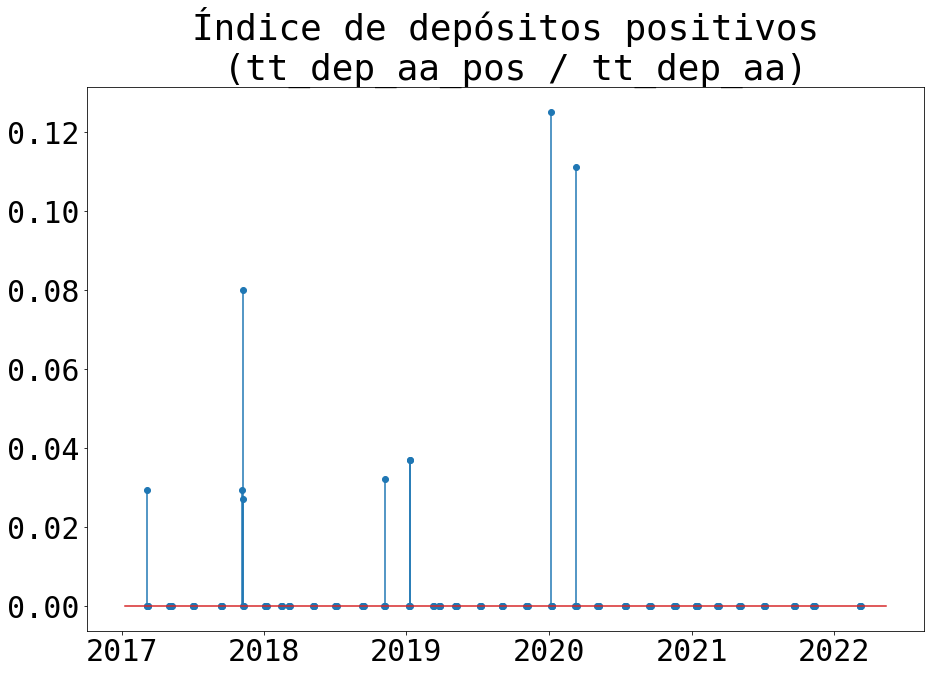

In [325]:
plt.figure(figsize=(15, 10))
plt.stem(data.index,
         index_pos)
plt.title("Índice de depósitos positivos\n (tt_dep_aa_pos / tt_dep_aa)")

* Maybe normalize?

In [312]:
index_pos_scaled = (index_pos - index_pos.min()) / (index_pos.max() - index_pos.min())

In [324]:
index_pos_scaled.mean(), index_pos_scaled.max()

(0.029681390139568227, 1.0)

Text(0.5, 1.0, 'Índice de positividade\n (tt_dep_aa_pos / tt_dep_aa)')

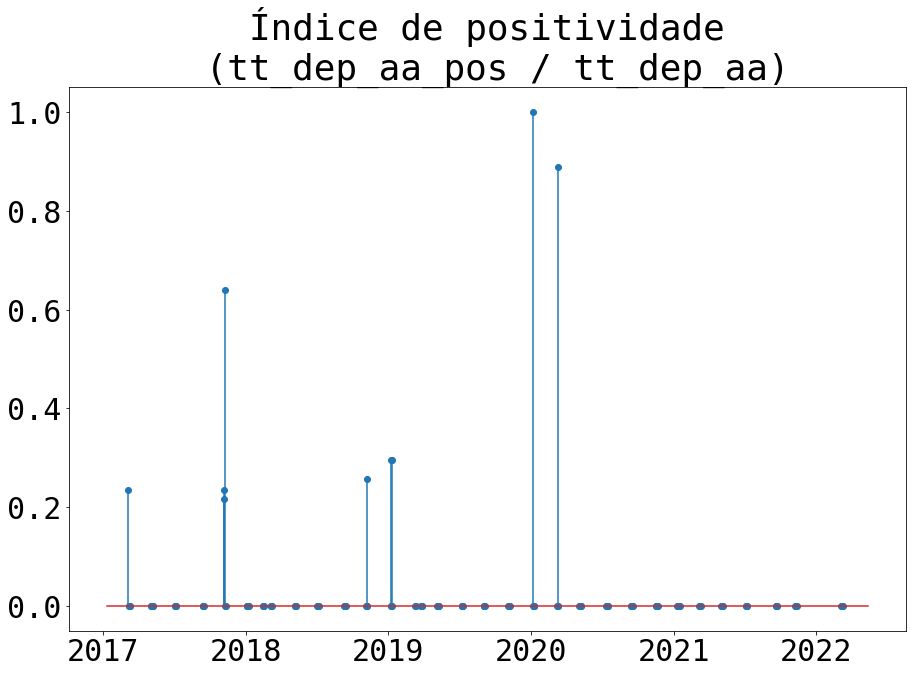

In [315]:
plt.figure(figsize=(15, 10))
plt.stem(data.index,
         index_pos_scaled)
plt.title("Índice de positividade\n (tt_dep_aa_pos / tt_dep_aa)")

## indice de infestacao acumulado  = armadilhas com femeas vivas ou mortas / total de armadilhas

Text(0.5, 1.0, 'Índice de infestação acumulado\n ((m_aaeg_f_v+m_aaeg_f_m) / total_armadil)')

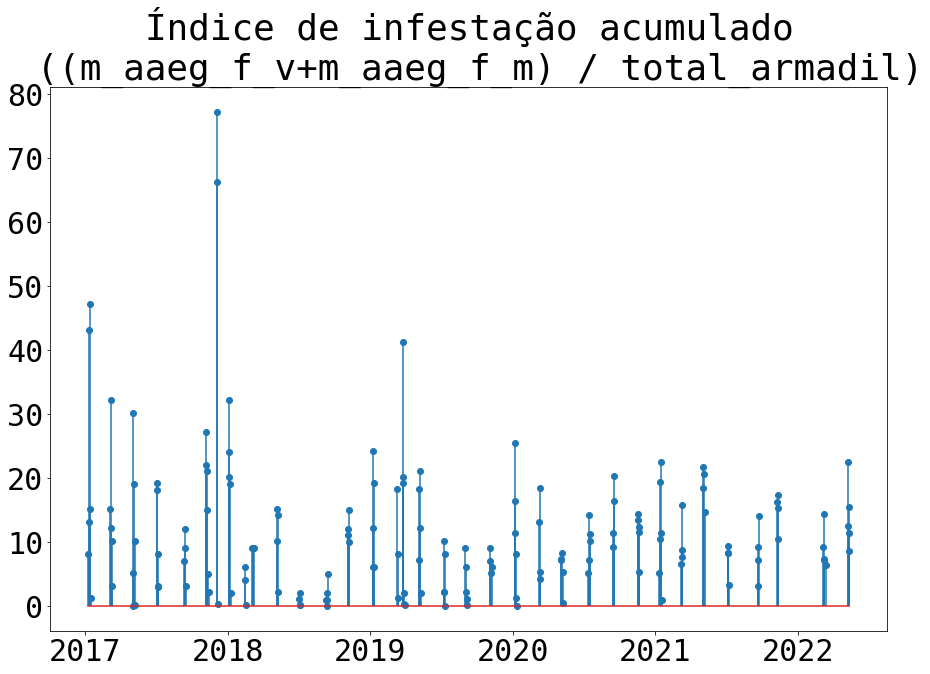

In [355]:
plt.figure(figsize=(15, 10))
plt.stem(data.index,
         data["m_aaeg_f_v"] + data["m_aaeg_f_m"] / data["id_armadil"])
plt.title("Índice de infestação acumulado\n ((m_aaeg_f_v+m_aaeg_f_m) / total_armadil)")

## indice de infestacao recente = armadilhas com femeas vivas/total de armadilhas

In [351]:
data["m_aaeg_f_v"] / data["id_armadil"]

2017-01-09    0.013605
2017-01-10    0.022887
2017-01-11    0.076649
2017-01-12    0.097510
2017-01-13    0.052817
                ...   
2022-05-09    0.020979
2022-05-10    0.039927
2022-05-11    0.020110
2022-05-12    0.032823
2022-05-13    0.205882
Freq: D, Length: 1951, dtype: float64

Text(0.5, 1.0, 'Índice de positividade\n (m_aaeg_f_v / total_armadil)')

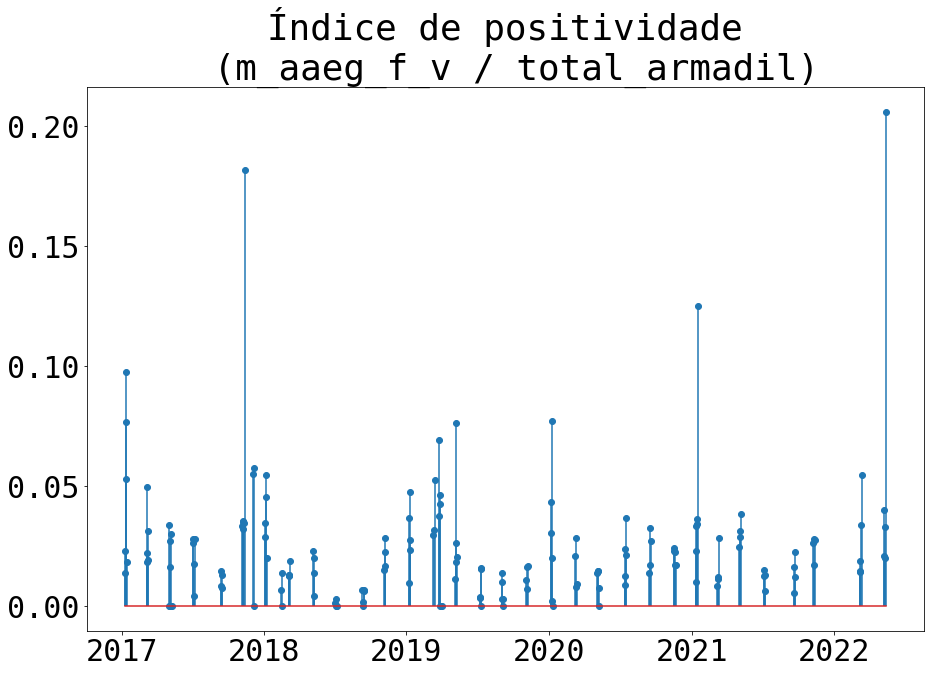

In [353]:
plt.figure(figsize=(15, 10))
plt.stem(data.index,
         data["m_aaeg_f_v"] / data["id_armadil"])
plt.title("Índice de positividade\n (m_aaeg_f_v / total_armadil)")